In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
train = pd.read_csv('/home/necati/machine_learning/Kaggle/Kaggle_datasets/trainSpaceship.csv')
test = pd.read_csv('/home/necati/machine_learning/Kaggle/Kaggle_datasets/testSpaceship.csv')

In [111]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

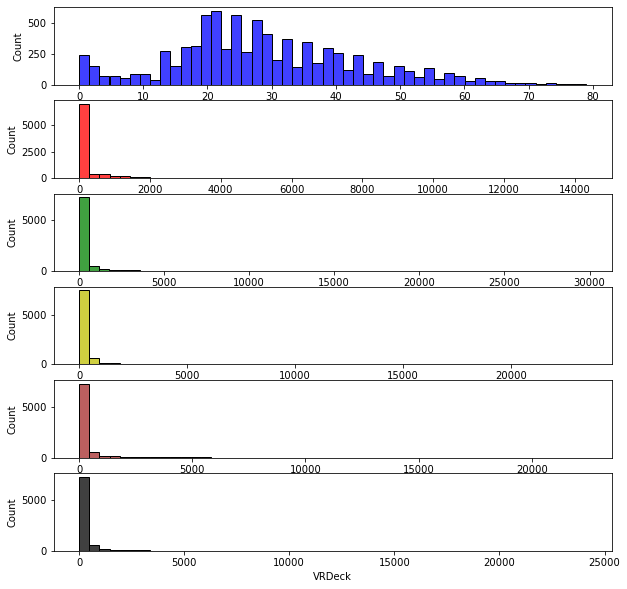

In [112]:
fig, ax = plt.subplots(6, 1, figsize=(10,10))
sns.histplot(train['Age'], color='b', bins= 50, ax=ax[0])
sns.histplot(train['RoomService'], color='r', bins=50, ax= ax[1])
sns.histplot(train['FoodCourt'], color='g', bins=50, ax=ax[2])
sns.histplot(train['ShoppingMall'], color='y', bins=50, ax=ax[3])
sns.histplot(train['Spa'], color='brown', bins=50, ax = ax[4])
sns.histplot(train['VRDeck'], color='black', bins=50, ax=ax[5])

In [113]:
train[['Deck', 'Cabin_num', 'Side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop('Cabin',axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
